## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
#print(study_results)
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)

In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_data['Mouse ID'].unique())

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_data = np.mean(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
median_data = np.median(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
var_data = np.var(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'], ddof = 0)
sd_data = np.std(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'], ddof = 0)
sem_data = sem(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])

print(clean_combined_data['Drug Regimen'].unique())

ramicane = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
mean_ramicane = np.mean(ramicane)
median_ramicane = np.median(ramicane)
var_ramicane = np.var(ramicane)
sd_ramicane = np.std(ramicane)
sem_ramicane = sem(ramicane)

capomulin = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
mean_capomulin = np.mean(capomulin)
median_capomulin = np.median(capomulin)
var_capomulin = np.var(capomulin)
sd_capomulin = np.std(capomulin)
sem_capomulin = sem(capomulin)

infubinol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
mean_infubinol = np.mean(infubinol)
median_infubinol = np.median(infubinol)
var_infubinol = np.var(infubinol)
sd_infubinol = np.std(infubinol)
sem_infubinol = sem(infubinol)

placebo = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)']
mean_placebo = np.mean(placebo)
median_placebo = np.median(placebo)
var_placebo = np.var(placebo)
sd_placebo = np.std(placebo)
sem_placebo = sem(placebo)

ceftamin = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
mean_ceftamin = np.mean(ceftamin)
median_ceftamin = np.median(ceftamin)
var_ceftamin = np.var(ceftamin)
sd_ceftamin = np.std(ceftamin)
sem_ceftamin = sem(ceftamin)

stelasyn = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Stelasyn']['Tumor Volume (mm3)']
mean_stelasyn = np.mean(stelasyn)
median_stelasyn = np.median(stelasyn)
var_stelasyn = np.var(stelasyn)
sd_stelasyn = np.std(stelasyn)
sem_stelasyn = sem(stelasyn)

zoniferol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)']
mean_zoniferol = np.mean(zoniferol)
median_zoniferol = np.median(zoniferol)
var_zoniferol = np.var(zoniferol)
sd_zoniferol = np.std(zoniferol)
sem_zoniferol = sem(zoniferol)

ketapril = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ketapril']['Tumor Volume (mm3)']
mean_ketapril = np.mean(ketapril)
median_ketapril = np.median(ketapril)
var_ketapril = np.var(ketapril)
sd_ketapril = np.std(ketapril)
sem_ketapril = sem(ketapril)

propriva = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)']
mean_propriva = np.mean(propriva)
median_propriva = np.median(propriva)
var_propriva = np.var(propriva)
sd_propriva = np.std(propriva)
sem_propriva = sem(propriva)

naftisol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)']
mean_naftisol = np.mean(naftisol)
median_naftisol = np.median(naftisol)
var_naftisol = np.var(naftisol)
sd_naftisol = np.std(naftisol)
sem_naftisol = sem(naftisol)

statistics_summary = pd.DataFrame({'Mean': [mean_ramicane, mean_capomulin, mean_infubinol, mean_placebo, mean_ceftamin, mean_stelasyn, mean_zoniferol, mean_ketapril, mean_propriva, mean_naftisol], 
                                   'Median': [median_ramicane, median_capomulin, median_infubinol, median_placebo, median_ceftamin, median_stelasyn, median_zoniferol, median_ketapril, median_propriva, median_naftisol], 
                                   'Variance': [var_ramicane, var_capomulin, var_infubinol, var_placebo, var_ceftamin, var_stelasyn, var_zoniferol, var_ketapril, var_propriva, var_naftisol], 
                                   'Standard Deviation': [sd_ramicane, sd_capomulin, sd_infubinol, sd_placebo, sd_ceftamin, sd_stelasyn, sd_zoniferol, sd_ketapril, sd_propriva, sd_naftisol], 
                                   'SEM': [sem_ramicane, sem_capomulin, sem_infubinol, sem_placebo, sem_ceftamin, sem_stelasyn, sem_zoniferol, sem_ketapril, sem_propriva, sem_naftisol]}, index = clean_combined_data['Drug Regimen'].unique())
print(statistics_summary)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_data_by_drug = clean_combined_data.groupby('Drug Regimen', sort = False)['Tumor Volume (mm3)']
avg_table = tumor_data_by_drug.mean()
med_table = tumor_data_by_drug.median()
var_table = tumor_data_by_drug.var()
std_table = tumor_data_by_drug.std()
sem_table = tumor_data_by_drug.sem()

statistics_summary_alt = pd.DataFrame({'Mean': avg_table, 'Median': med_table, 'Variance': var_table, 'Standard Deviation': std_table, 'SEM': sem_table})
print(statistics_summary_alt)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
                Mean     Median   Variance  Standard Deviation       SEM
Ramicane   40.216745  40.673236  23.383692            4.835669  0.320955
Capomulin  40.675741  41.557809  24.839296            4.983904  0.329346
Infubinol  52.884795  51.820584  42.886388            6.548770  0.492236
Placebo    54.033581  52.288934  60.830138            7.799368  0.581331
Ceftamin   52.591172  51.776157  39.069446            6.250556  0.469821
Stelasyn   54.233149  52.431737  59.122106            7.689090  0.573111
Zoniferol  53.236507  51.818479  48.266689            6.947423  0.516398
Ketapril   55.235638  53.698743  68.188930            8.257659  0.603860
Propriva   52.320930  50.446266  43.555716            6.599675  0.544332
Naftisol   54.331565  52.509285  65.817708            8.112811  0.596466
                   Mean     Median   Variance  Standard Deviation       SEM
Drug R

## Bar and Pie Charts

Drug Regimen
Ramicane     [k403, g791, s508, m546, z578, j913, n364, c75...
Capomulin    [s185, x401, m601, f966, u364, y793, r554, m95...
Infubinol    [a203, a251, a577, a685, c139, c326, c895, e47...
Placebo      [a262, a897, c282, c757, c766, e227, i477, i66...
Ceftamin     [a275, b447, b487, b759, f436, h531, j296, k21...
Stelasyn     [a366, a492, a963, b879, c402, f234, g867, h33...
Zoniferol    [a401, a788, b313, c264, c302, c559, d133, d16...
Ketapril     [a457, c580, c819, c832, d474, f278, f932, g10...
Propriva     [a699, c927, g558, g570, i635, k603, l215, n48...
Naftisol     [a818, b559, e213, e291, e584, f993, j755, l70...
Name: Mouse ID, dtype: object


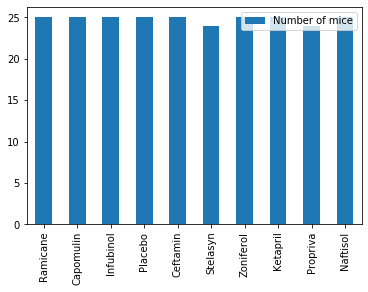

In [172]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_by_regimen = clean_combined_data.groupby('Drug Regimen', sort = False)['Mouse ID'].unique()
print(mice_by_regimen)

ram_mice = len(mice_by_regimen[0])
cap_mice = len(mice_by_regimen[1])
inf_mice = len(mice_by_regimen[2])
pla_mice = len(mice_by_regimen[3])
cef_mice = len(mice_by_regimen[4])
ste_mice = len(mice_by_regimen[5])
zon_mice = len(mice_by_regimen[6])
ket_mice = len(mice_by_regimen[7])
pro_mice = len(mice_by_regimen[8])
naf_mice = len(mice_by_regimen[9])
mice_regimen_number = [ram_mice, cap_mice, inf_mice, pla_mice, cef_mice, ste_mice, zon_mice, ket_mice, pro_mice, naf_mice]

mice_regime_df = pd.DataFrame({'Number of mice': mice_regimen_number}, index = clean_combined_data['Drug Regimen'].unique())
mice_regime_df.plot.bar()

([<matplotlib.axis.XTick at 0x1ccbcc6aa48>,
 <a list of 10 Text xticklabel objects>)

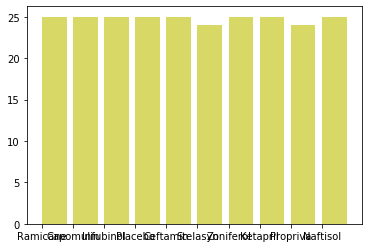

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color = 'y', alpha = 0.6, align = 'edge')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_combined_data['Drug Regimen'].unique())

Sex
Male      [k403, m601, g791, s508, f966, m546, z578, u36...
Female    [s185, x401, j913, r554, m957, t565, a644, i73...
Name: Mouse ID, dtype: object


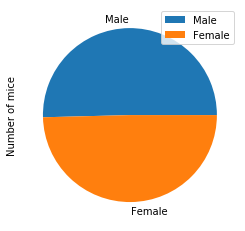

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_sex = clean_combined_data.groupby('Sex', sort = False)['Mouse ID'].unique()
print(mice_by_sex)

male_mice = len(mice_by_sex[0])
fema_mice = len(mice_by_sex[1])
mice_sex_number = [male_mice, fema_mice]

mice_sex_df = pd.DataFrame({'Number of mice': mice_sex_number}, index = clean_combined_data['Sex'].unique())
mice_sex_df.plot.pie(y = 'Number of mice')

([<matplotlib.patches.Wedge at 0x1ccbeea7508>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')])

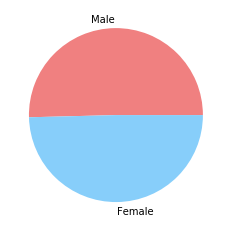

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mice_sex_number
labels = clean_combined_data['Sex'].unique()
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels = labels, colors = colors)

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the
clean_combined_data.groupby(['Drug Regimen', 'Tumor Volume (mm3)']).min()

Mouse ID     Sex  Age_months  Weight (g)  \
Drug Regimen Tumor Volume (mm3)                                            
Capomulin    23.343598              s185  Female           3          17   
             25.472143              s185  Female           3          17   
             28.167397              x401  Female          16          15   
             28.328531              s185  Female           3          17   
             28.430964              m601    Male          22          17   
...                                  ...     ...         ...         ...   
Zoniferol    68.498639              q633    Male          12          25   
             68.611061              q511  Female           2          28   
             70.827796              q633    Male          12          25   
             71.108118              f545  Female          20          26   
             73.324432              f545  Female          20          26   

                                 Timepoint  Metastatic Sites  
Drug Regimen Tumor Volume (mm3)                               
Capomulin    23.343598                  45                 1  
             25.472143                  40                 1  
             28.167397                  40                 0  
             28.328531                  35                 1  
             28.430964                  45                 1  
...                                    ...               ...  
Zoniferol    68.498639                  40                 2  
             68.611061                  45                 3  
             70.827796                  45                 2  
             71.108118                  40                 1  
             73.324432                  45                 1  

[1642 rows x 6 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
